# <font color='orange'> **CS51 Assignment 2: Algorithms and Simulation**</font>



This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.


**You must complete all tasks within this pre-formatted Jupyter notebook. Please follow ALL formatting guidelines and the HC Guidelines in the assignment instructions on Forum (near the top and bottom of the instructions respectively).**


## <font color='orange'> **PART 1**: OPTIMIZATION</font>

For this section of the assignment, you will select one of the scenarios below and apply #optimization. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2. It may be helpful to include a map of these cities (either an existing map or create your own).  


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 

Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective value would be measured and how the decision variables would impact it (~200 words). 


<font color='orange'>**Answer 1.1:**</font> <br>
**Optimization problem:**

Our task is to distribute the Covid-19 vaccine quickly to 15 different cities.
We assume that choosing the shortest cumulative distance route will be the quickest way to deliver the vaccines.

**Our optimization problem includes the following:**

**Decision variables:** 

* The order in which the cities are to be visited, as it directly impacts the distance. The order of visitation will determine the shortest cumulative distance route between the cities. This decision variable is **qualitative ordinal** since we are ranking the cities to get the shortest path.

**Objective value:** 

* The total distance, which will be measured in kilometers. It is a **quantitative continuous** variable, as it may be any non-integer value within a range of numbers.

**Objective Function:** 

* To minimize the total distance traveled (objective value) between the selected 15 cities. 

**Constraints:**

* Visiting one city at a time, all of the cities need to be visited, none can be skipped. 
* We cannot re-visit the cities that we been to once, hence, one city can only be visited once. 
* Some of the practical constraints may include availability of transportation and the costs associated with air transportation (if chosen). 
* Therefore, We need to choose a dynamic algorithm as there is randomness associated with cities and all have different coordinates.


#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, required steps, and the termination condition. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

- *Optional*: Draw a flowchart to illustrate the process. 

- *Optional challenge*: Create a program in Python to implement this optimization process. Please provide a thorough explanation of how the code works, both holistically and using in-line comments. You must also provide at least one “test case” that demonstrates that your code is properly implemented. This test should be something like, “In this case, it's clear that the only possible solution is X; let's check that with our code. Yes, the code outputs X as well, so we can in principle induce that the implementation is correct."

<font color='orange'>**Answer 1.2 here**</font>


I will be using Genetic algorithm for the optimization of this problem.
Thanks to its stochastic nature, we will be able to randomly order the cities that need to be visited. 
As it learns with every iteration, there are more chances of reaching the global maxima.


**Input:**
Coordinates of all the cities (to calculate the distance between them).

**Required Steps:**
1. Setting the initial Population: The number of routes/orders for all the cities (N) for visitation is referred to as the Population. We will refer to these possible routes as individuals, therefore, the array as population. We pre-set the hyperparameter (N) to determine the number of individuals (visitation orders) produced.
2. Fitness: For every individual (possible route) the fitness function calculate the cumulative distance, which is our fitness value.
3. Survivor Selection: The individuals (possible routes) with lowest fitness value (cumulative distance) have a higher probability of being selected and their genes being passed on to the next generation.
4. Performing crossover: New routes are created by inheriting their genes from two parent solutions. By combining two fit traits, we hope that the individuals produced will be even fitter (lower cumulative distance). It increases variability and maintains diversity. 
5. Mutation: Refers to swapping the position of cities in a route. We iterate genes by randomly selecting a city to swap with another.
6. Iteration: We repeat steps 2-5 until the set number is reached. 

**Termination condition:**
When the set number of generations is reached, our algorithm wil stop, and the solution from the last generation would be the best.

**Output:**
The most suitable order of cities with the cumulative distance.


## <font color='orange'> **PART 2**: SIMULATION</font>


The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Weeks 7 and 8 of CS51. Check out the class readings to learn about this model. 


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.

2. Identify the relevant **variables** of the model, fully classify what type of variables they are, and explain what they mean in the context of your model. Next, identify appropriate numerical values and units for the **initial values** of the variables. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.

3. Explain what the relevant **parameters** ($b$ and $k$) are and what they mean. For your model, identify and justify appropriate numerical values and units for $b$ and $k$. As above, you may include a well-reasoned estimate using empirical data to support your justification. Further, explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors, in the context of the disease you selected, would reduce or increase these parameters.

4. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

<font color='orange'>**Answer 2.1.1:**</font> <br>

I will be modelling Covid-19 in Pakistan.

**Variables:**

**Independent variable:**

**Time (t):**
* We classify time as a quantitative continuous variable, as upon measurement, it can take any non-integer value within a range (based on accuracy of measuring device). The SIR model also uses it as a continuous variable. Although we consider time in days and count it in whole numbers, there might be instances such as 2.5 days.

**Pakistan’s total population, (N):**
* As an individual cannot be partial and is always a whole number, the population will be a quantitative discrete variable.

* In 2020, Pakistan’s population (N) was estimated at 208,570,000 people (Statista, 2020).
 
**Dependent variables:**

**I(t):** number of infected population at a given day (unit = people)
In order to simulate spread of a disease, we will assume 100 (>0) individuals have been infected to start the model, I(0) = 100.

**R(t):** number of recovered/removed population at a given day (unit = people)
* As the disease just broke out, we assume R(0) = 0.

**S(t):** number of susceptible population at a given day (unit = people)
* As, **N = S + I + R,** and none have recovered yet, thus,
* S(0) = 208,570,000 - 100 - 0 = **208,569,900** people.

**Note:** As differential equations require continuous data, S(t), I(t), R(t) will be treated as continuous functions of time (t).

**Parameters:**

**Infection rate (b)** for Pakistan = 0.089 (Shah STA, Mansoor M, Mirza AF, et al, 2020)
* Unit = 1/time (day)
* We interpret this value as number of transmissions by an infected individual in one day. Simply put, based on this number, an infected individual will infect a susceptible individual in approximately 11.24 days. 
* Lower value of b means less spread of the virus per day. We can do so by implementing better isolation, wearing masks and using sanitizer properly, or placing travel restrictions.

**Recovery rate (k)** for Pakistan = 0.058 (Shah STA, Mansoor M, Mirza AF, et al, 2020)
* Unit = 1/time (day)
* For an infected individual to be fully recovered/removed it would take 17.24 days if the recovery rate is 0.058. * So in one day an individual recovers 5.8%.
* Increased k will result in faster recovery from covid, curtailing spread of the virus. k can be increased by better medical facillites and quick vaccine distribution. 


**References:**

Pakistan - Total Population 2014-2024  | Statista. Statista, Statista, 2014, www.statista.com/statistics/383245/total-population-of-pakistan/.

Shah STA, Mansoor M, Mirza AF, et al. Predicting COVID-19 Spread in Pakistan using the SIR Model. J Pure Appl Microbiol. 2020;14(2):1423-1430. doi: 10.22207/JPAM.14.2.40 

https://microbiologyjournal.org/predicting-covid-19-spread-in-pakistan-using-the-sir-model/

#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify the inputs, outputs, and steps that the algorithm takes, and consider the role of the step size (`h`) in the algorithm. 

<font color='orange'>**Answer 2.1.2:**</font>

We will divide the Euler’s method algorithm into **inputs, intermediate steps, and output.**


**Inputs:**
1. Initial conditions: 
* Time in days (t), 400 days.
* Population of Pakistan (N), 208,570,000.
* Values of S, I, and R (mentioned in 2.1.1)

2. Parameters: b and k (infection rate and recovery rate) mentioned in 2.1.1.

3. SIR model’s Differential Equations: Mentioned in the code.

4. Stepsize:
* We use the stepsize, h = 1. Using a lower step size although reduces the error, and provides us with an accurate approximation of real life values. Might be prone to over fitting.


**Intermediate steps:**
* Using the first values that we input for S(N), I(N), R(N), the algorithm would loop through the equations until it reaches the termination condition. 
* Each iteration is calculated and then stored, S[n+1], I[n+1], and R [n+1]. 
* Using the previously stored values, the subsequent values are calculated.
 
**Output:**
* Solution sets in the form of array for S, I, and R close to the real analytical value at given times. 


#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Define a function that implements a numerical simulation to derive the implications of your model using Euler’s method in Python. Your simulation must generate at least one relevant visualization of the disease dynamics (see required analysis below), including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

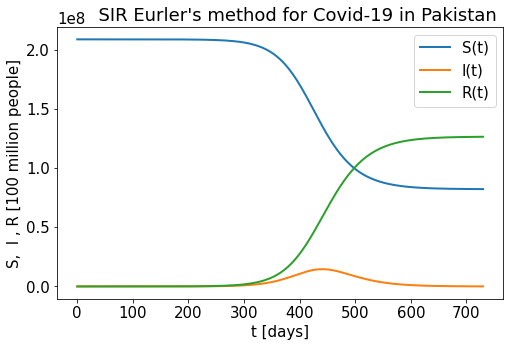

In [1]:
# write your function to implement the numerical simulation here!
#The code used in this solution is generated from  CS51 session 13 : 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]

def SIR_Euler(b,k,initial_conds):
    '''
    This functions intakes the b,k and initial conditions of S,I,R 
    and outputs a visualization showing the generated points.
    '''
    t0 = 0 # our initial point 
    t_end = 730 #  Time lapse for our simulation, 2 years

    h = 1 #  #the step size of our algorithm
    steps = int((t_end - t0)/h + 1) # number of steps
   #where h is the step size( thus it is the time difference divided by the step_size added by one )
    # variables:
    t = np.linspace(t0, t_end, steps) #creates an array of values 0-50
    S = np.zeros(steps)  
    I = np.zeros(steps) 
    R = np.zeros(steps)  
#np.zeros creates an array with zeros as the prior calcualted number of steps.
    # initial conditions:
    S[0] = initial_conds[0]  # the initial value of S gotten from the initial conds list
    I[0] = initial_conds[1]  # the initial value of I gotten from the initial conds list
    R[0] = initial_conds[2]  # the initial value of S gotten from the initial conds list
    N = S[0] + I[0] + R[0]  # total population
    for n in range(steps-1): #loops through the calculates the changeds in S,I,R respectively as per the stepsize.
        S[n+1] = S[n] + (h * - ((b/N)*(S[n] * I[n]))) #computation of S as per the stepsize
        I[n+1] = I[n] + (h * ((b/N)* S[n] * I[n]) - (k*I[n])) #computation of I as per the stepsize.
        R[n+1] = R[n] + (h *  (k * I[n])) #computation of R as per the stepsize.
     
    plt.plot(t,S,linewidth=2, label='S(t)') #  a lineplot of susceptible population against time.
    plt.plot(t,I,linewidth=2, label='I(t)') # a line plot of infected population against time.
    plt.plot(t,R,linewidth=2, label='R(t)') # a lineplot of the recovered population against time.
    plt.xlabel('t [days]') #outputs the x label of our graph.
    plt.ylabel('S,  I , R [100 million people]') #outputs the y label of our graph.
    plt.title("      SIR Eurler's method for Covid-19 in Pakistan") #outputs the title  
    plt.legend(loc='best') #positions the legend and outputs the values as per 
    plt.show() #we call this function to output our graph.

# parameters:
infection_rate = 0.089 # parameter for the infection rate 
recovery_rate =  0.058 # parameter for the recovery rate.

# initial conditions: 
S0 =  208569900
I0 = 100
R0 = 0
initial_vals = [S0,I0, R0] #stores our intial values of S,I,R.

# call the function to run the simulation
SIR_Euler(b=infection_rate, k=recovery_rate, initial_conds=initial_vals)

#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should re-run the simulation above multiple times with varying parameter inputs ($b$ and $k$) and observe the behavior of your model. Include at least two additional visualizations here to support your answer. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 2.1.1.3 above)?  

- *Optional*: include at least one multidimensional phase space plot and provide a full interpretation of what it shows.

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


**Scenario 1 (using values from source):**

Due to the disease's low infection rate of 0.089, we only notice a rise in the infected population around day 350, which is the end of one year. It is around that time that the recovered population starts to increase due to the recovery rate of 0.058. The susceptible population subsequently starts to decline around that time period as the total population is the sum of S, I, and R. By the end of the second year, the infected population has declined again to 0 whereas the recovered population has increased to 135 million which subsequently lead the susceptible population to decrease to 70 million. 

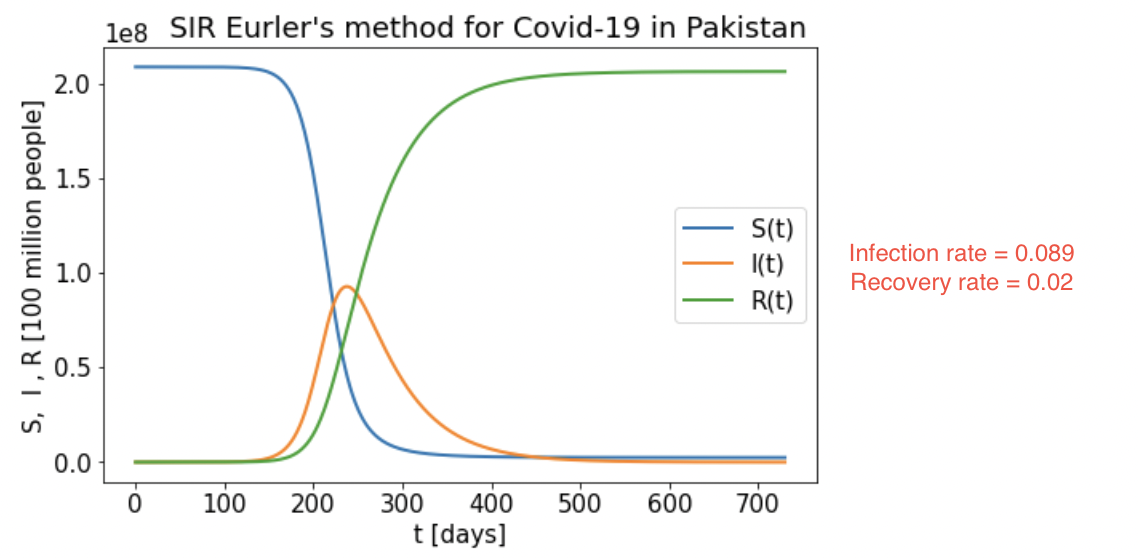

In [2]:
from IPython.display import Image
Image("Scenario2.png")

**Scenario 2:**
    
However, in this scenario, where we have lowered the recovery rate to 0.02, we see that the infected population reaches 100 million people (half the population) which is more representative of the real-life scenario in Pakistan. Due to the lack of medical facilities and people unwilling to vaccinate themselves and their families due to cultural and religious values, the susceptible individuals adopted a strong negative gradient on the 180th day after the first case. However, still assuming that the infection rate is still quite low, we see all of the population recovering by the end of one year.

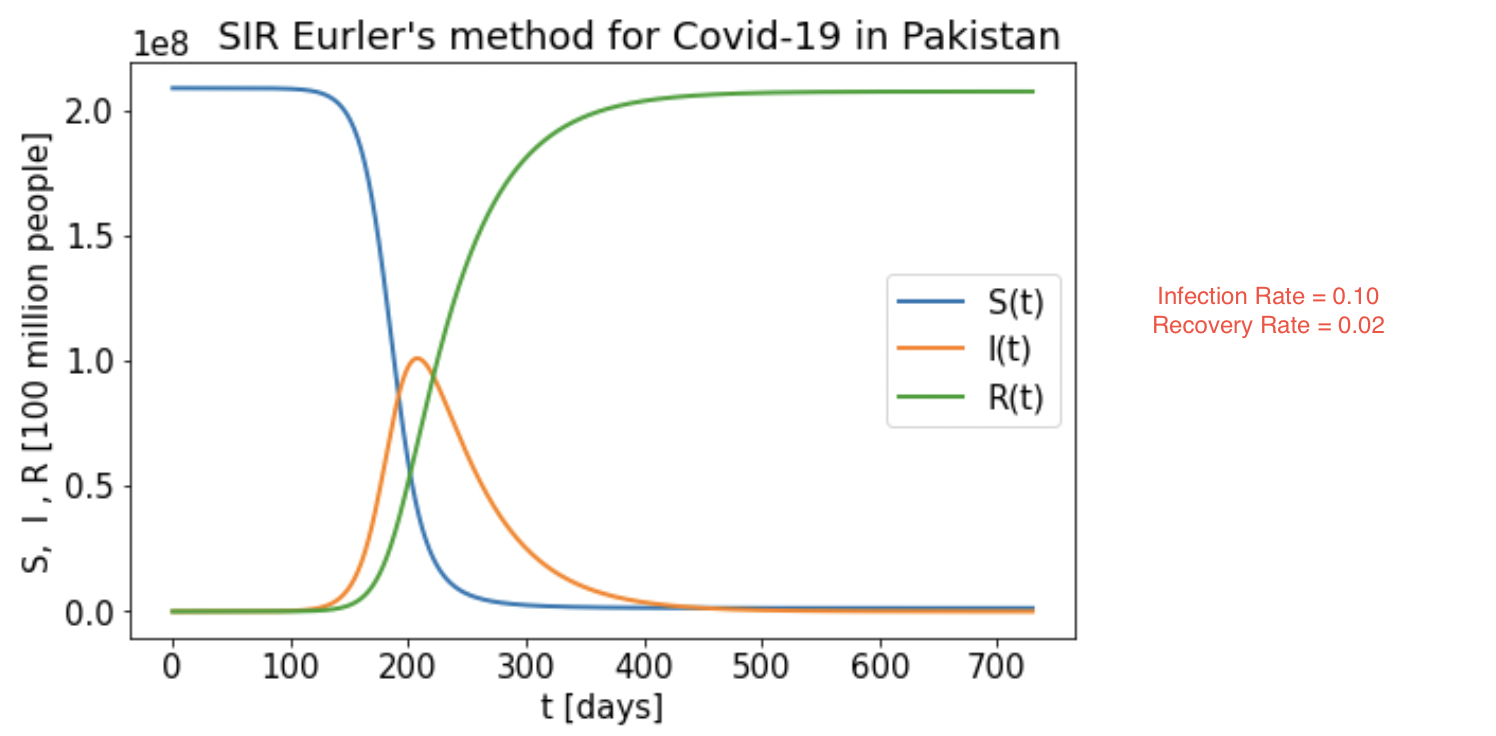

In [3]:
from IPython.display import Image
Image("Scenario3.png")

**Scenario 3:**

In this scenario, we have increased the infection rate to 0.1 which is accurate as people in Pakistan are careless towards preventive measures such as wearing masks, gathering in huge crowds, and not getting tested frequently. Here, we see an even earlier increase in infected people, i.e., on the 200th day. Consequently, the whole population has fully recovered substantially before the end of the first year. 

<font color='orange'>**Answer 2.1.4 here**</font>

### **Part 2.2 Agent-Based Modeling and Simulation (*OPTIONAL*)**

This part of the assignment is optional and will only be scored if completed effectively (score of 4 or 5). It is a valuable chance to compare the simulation above with the agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). 

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 *Optional*: Simulation Comparison (~250 words) [#modeling]

After fully exploring the NetLogo model and running multiple simulations, summarize how it compares to your Python SIR simulation above. Aim to identify the main similarities, the major differences, and at least advantage for each one. Comment on which you believe to be a more realistic representation of nature, justifying your reasoning.



<font color='orange'>**Answer 2.2.1 here**</font>

#### 2.2.2 *Optional challenge*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


In [4]:
# Add code to complete the optional implementation 
# Add more cells as needed to explain your work

## <font color='orange'>**REFLECTION**</font>

In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you. 

<font color='orange'>**Reflection**</font>

We witnessed the calamity that Covid-19 brought all around the world. Understanding such contagious diseases has never been more important. This unit introduced us to the SIR model that helps in predicting both the long and short-term spread, as well as its severity. Being able to simulate a disease's spread by models and algorithms helps in tackling real-life scenarios. Gaining insights into how a slight change in infection and recovery rate makes a huge difference, motivates us to take precautionary measures, preventing the situation from further deterioration. These powerful tools, capable of simulating any contagious disease for any population prepare us for a healthy future, if we are willing to look deep enough.

## You're done! 

You must upload TWO files:


1. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Email attachments will not be accepted. We encourage students to follow the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing), especially the best practices listed at the end.


2. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.